<a href="https://colab.research.google.com/github/ghosesuvendu/dataScience/blob/main/Random_Forest%E2%80%99s_hyperparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Data
import pandas as pd
from sklearn.datasets import load_wine# Data split
from sklearn.model_selection import train_test_split# Model
from sklearn.ensemble import RandomForestClassifier# Visualize Tree
from sklearn.tree import export_graphviz# Load dataset
df = load_wine()
df

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [10]:
# variables
X = pd.DataFrame(df.data, columns=df.feature_names)
# target
y = df.target# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)

In [11]:
y_train

array([0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 0, 0, 2, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 2, 0, 1, 1, 2,
       1, 0, 2, 0, 1, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 0, 0, 1, 1, 1,
       2, 0, 0, 2, 2, 2, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0,
       1, 0, 2, 2, 2, 1])

In [12]:
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
21,12.93,3.80,2.65,18.6,102.0,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770.0
152,13.11,1.90,2.75,25.5,116.0,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425.0
11,14.12,1.48,2.32,16.8,95.0,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280.0
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0
93,12.29,2.83,2.22,18.0,88.0,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
130,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630.0
134,12.51,1.24,2.25,17.5,85.0,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650.0
155,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0


In [13]:
# Instantiate class. Using random_state=2 for you to be able to reproduce the same result
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                            max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, 
                            n_jobs=None, random_state=2, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, 
                            max_samples=None)

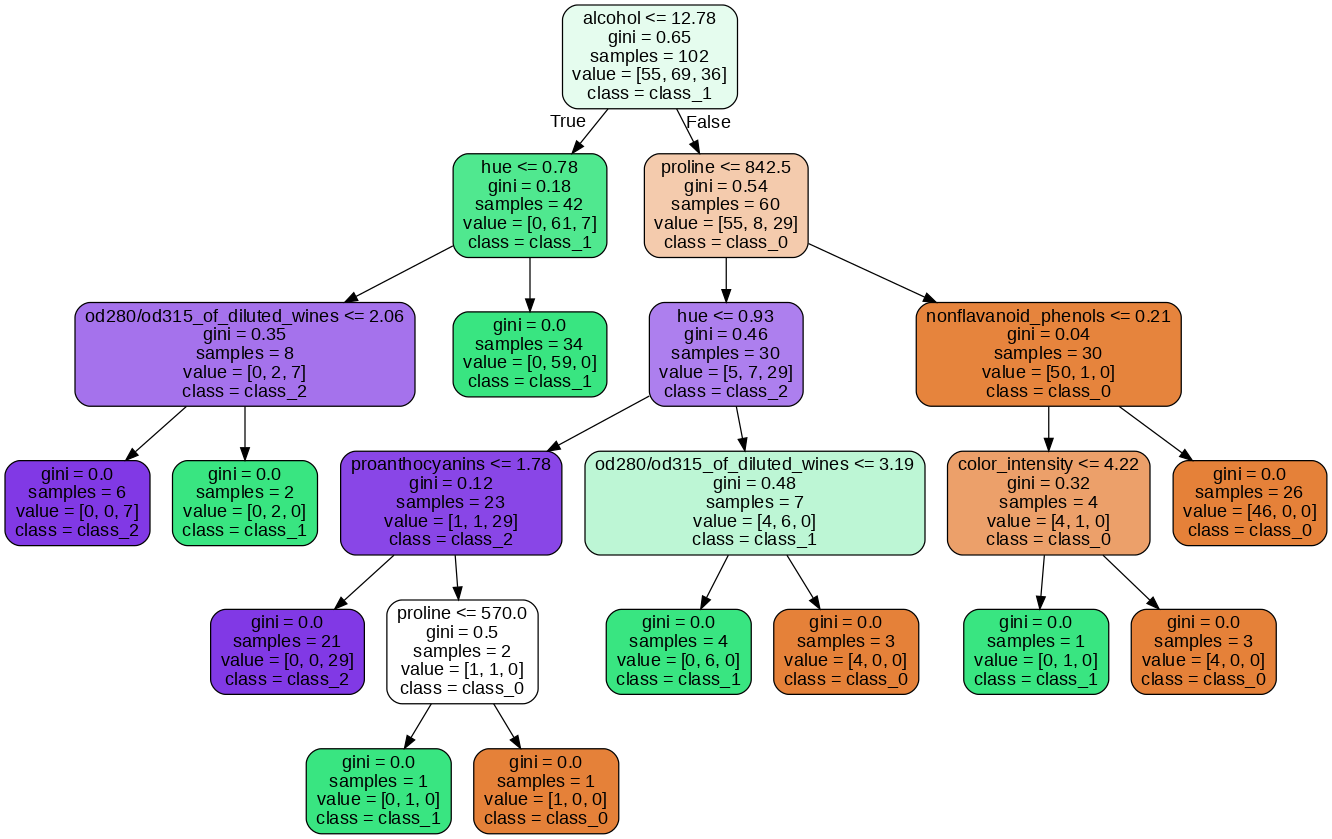

In [14]:
# Fit the model
rf.fit(X_train,y_train)# Extract one of the trees from the model
tree = rf.estimators_[99]# Export as dot file
export_graphviz(tree, out_file='tree.dot',
feature_names = df.feature_names, class_names = df.target_names, rounded = True, proportion = False, precision = 2, filled = True)# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=90'])# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [16]:
# Instantiate class
rf = RandomForestClassifier(max_depth = 2)

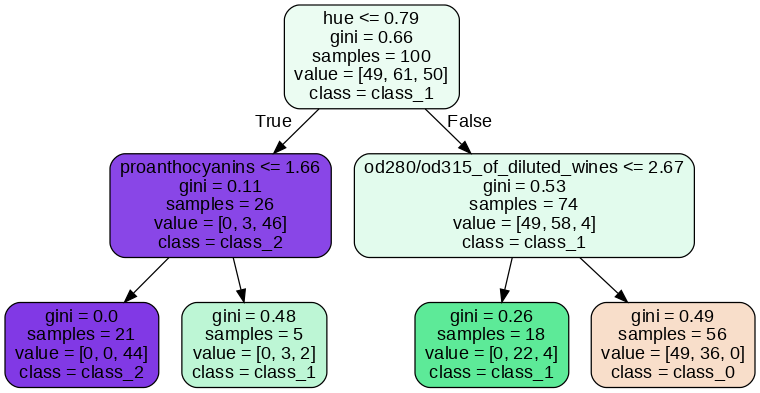

In [17]:
# Fit the model
rf.fit(X_train,y_train)# Extract one of the trees from the model
tree = rf.estimators_[99]# Export as dot file
export_graphviz(tree, out_file='tree.dot',
feature_names = df.feature_names, class_names = df.target_names, rounded = True, proportion = False, precision = 2, filled = True)# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=90'])# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [18]:
rf = RandomForestClassifier(min_samples_split=50, random_state=2)

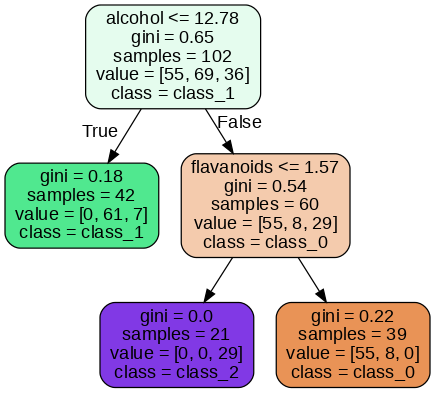

In [19]:
# Fit the model
rf.fit(X_train,y_train)# Extract one of the trees from the model
tree = rf.estimators_[99]# Export as dot file
export_graphviz(tree, out_file='tree.dot',
feature_names = df.feature_names, class_names = df.target_names, rounded = True, proportion = False, precision = 2, filled = True)# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=90'])# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [33]:
# Fit the model
rf = RandomForestClassifier(max_leaf_nodes=4, random_state=2)


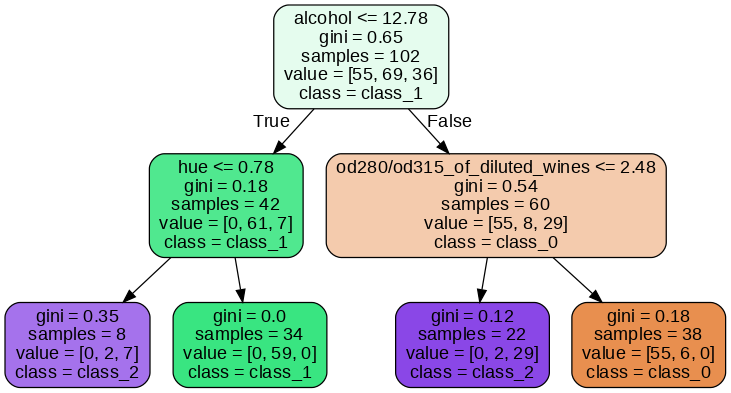

In [34]:
rf.fit(X_train,y_train)# Extract one of the trees from the model
tree = rf.estimators_[99]# Export as dot file
export_graphviz(tree, out_file='tree1.dot',
feature_names = df.feature_names, class_names = df.target_names, rounded = True, proportion = False, precision = 2, filled = True)# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree1.dot', '-o', 'tree1.png', '-Gdpi=90'])# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree1.png')

In [29]:
rf = RandomForestClassifier(min_samples_leaf=20, random_state=2)

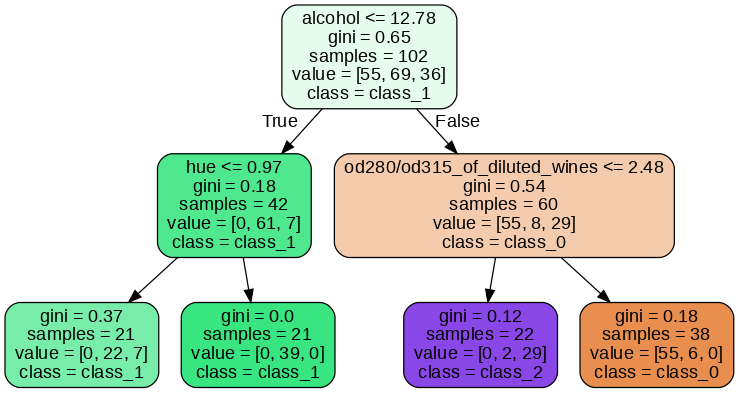

In [30]:
rf.fit(X_train,y_train)# Extract one of the trees from the model
tree = rf.estimators_[99]# Export as dot file
export_graphviz(tree, out_file='tree1.dot',
feature_names = df.feature_names, class_names = df.target_names, rounded = True, proportion = False, precision = 2, filled = True)# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree1.dot', '-o', 'tree1.png', '-Gdpi=90'])# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree1.png')


In [41]:
rf = RandomForestClassifier(ccp_alpha=0.1, random_state=2)

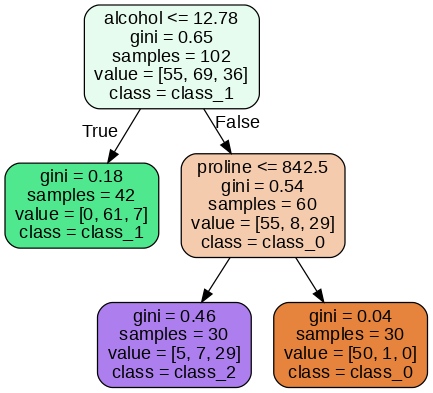

In [42]:
rf.fit(X_train,y_train)# Extract one of the trees from the model
tree = rf.estimators_[99]# Export as dot file
export_graphviz(tree, out_file='tree1.dot',
feature_names = df.feature_names, class_names = df.target_names, rounded = True, proportion = False, precision = 2, filled = True)# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree1.dot', '-o', 'tree1.png', '-Gdpi=90'])# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree1.png')